In [19]:
!pip install plotly

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import urllib.request
import json
from scipy.optimize import curve_fit
import datetime
import seaborn as sns
import plotly.express as px

In [21]:
df1=pd.read_csv('HD_3year.csv')
df2 = pd.DataFrame(columns=['month','Day','Hour','Minute'])
for x in df1['DateTime']:
    m = x[1]+x[2]
    d = x[4]+x[5]
    h = x[7]+x[8]
    mi = x[10]+x[11]
    df2 = df2.append({'month': float(m),'Day': float(d),'Hour':float(h),'Minute':float(m)}, ignore_index=True)   
df1 = df1.join(df2)


In [22]:
df1 = df1[(df1['Outdoor_Temperature'] < 30) & (df1['DH_Heating_Rate'] < 350)]

In [23]:
df1.dropna
X = df1[['Outdoor_Temperature','Hour','month','Day']]
y = df1['DH_Heating_Rate'].round()

In [24]:
Foremodel = LinearRegression().fit(X, y)

In [25]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/forecasts/v1/hourly/12hour/330088?apikey=cJO52cgVK2bIz3A4dPK0rfjQEBuqGVk3')
response = json.loads(f.read())
weatherforecast = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(12):
    temp=round((response[i]['Temperature']['Value']-32)*5/9,2)
    Dt = datetime.datetime.strptime(response[i]['DateTime'], '%Y-%m-%dT%H:%M:%S+01:00')
    for j in range(4):
        weatherforecast = weatherforecast.append({'Temp':temp,'month': Dt.month,'Day': Dt.day,'Hour':Dt.hour}, ignore_index=True)

In [26]:
weatherforecast

,Temp,month,Day,Hour
0,24.44,8.0,6.0,13.0
1,24.44,8.0,6.0,13.0
2,24.44,8.0,6.0,13.0
3,24.44,8.0,6.0,13.0
4,25.00,8.0,6.0,14.0
5,25.00,8.0,6.0,14.0
6,25.00,8.0,6.0,14.0
7,25.00,8.0,6.0,14.0
8,25.56,8.0,6.0,15.0
9,25.56,8.0,6.0,15.0


In [27]:
f = urllib.request.urlopen('http://dataservice.accuweather.com/currentconditions/v1/330088/historical/24?apikey=cJO52cgVK2bIz3A4dPK0rfjQEBuqGVk3')
                           
response = json.loads(f.read())
weatherforecast = pd.DataFrame(columns=['Temp','month','Day','Hour'])
for i in range(24):
    temp=response[i]['Temperature']['Metric']['Value']
    Dt = datetime.datetime.strptime(response[i]['LocalObservationDateTime'], '%Y-%m-%dT%H:%M:%S+01:00')
    weatherforecast = weatherforecast.append({'Temp':temp,'month': Dt.month,'Day': Dt.day,'Hour':Dt.hour}, ignore_index=True)

In [28]:
weatherforecast = weatherforecast.sort_values(by=['Hour'])

In [29]:
forecast_DH = np.array([])
for i in range(len(weatherforecast)):
    if ((weatherforecast.iloc[i,0] > 15) or (weatherforecast.iloc[i,3] >= 0 and weatherforecast.iloc[i,3] < 6) ):
        forecast_DH = np.append(forecast_DH,20).round(2)
    else:
        x =  pd.DataFrame((weatherforecast.iloc[i,0],weatherforecast.iloc[i,1],
                           weatherforecast.iloc[i,2],weatherforecast.iloc[i,3]))
        forecast_DH = np.append(forecast_DH,Foremodel.predict(x.T))


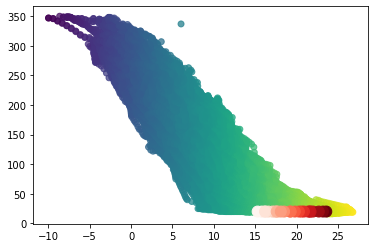

In [30]:
plt.scatter(X['Outdoor_Temperature'],y,c=X['Outdoor_Temperature'],alpha = 0.75)
plt.scatter(weatherforecast.Temp,forecast_DH,s=120,c=weatherforecast.Temp,cmap=plt.cm.Reds)

In [31]:
forecast_DH

array([20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.])

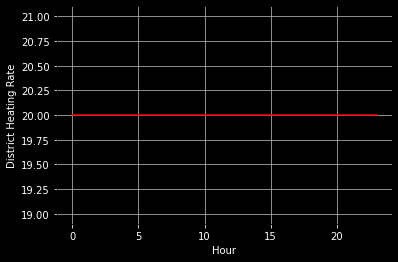

In [55]:
fig, ax = plt.subplots()
fig.set(facecolor='black')
#ax.scatter(weatherforecast.Hour,forecast_DH,c='black')
ax.set(facecolor='black')
ax.set_xlabel('Hour')
ax.tick_params(axis='x', colors='white')
ax.set_ylabel('District Heating Rate')
ax.tick_params(axis='y', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.grid(True)
ax.set_xlim(0,23,auto=True)
ax.plot(weatherforecast.Hour,forecast_DH,'r')

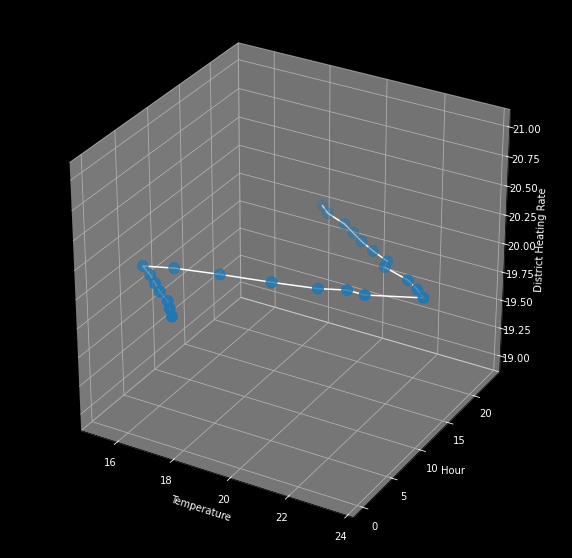

In [33]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
ax.scatter3D(weatherforecast.Temp, weatherforecast.Hour, forecast_DH,cmap='hot', s=120)
ax.plot3D(weatherforecast.Temp, weatherforecast.Hour, forecast_DH,c='w')
ax.set(facecolor='black')
fig.set(facecolor='black')
ax.set_xlabel('Temperature')
ax.tick_params(axis='x', colors='white')
ax.set_ylabel('Hour')
ax.tick_params(axis='y', colors='white')
ax.set_zlabel('District Heating Rate')
ax.tick_params(axis='z', colors='white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')

In [34]:
fig = px.scatter_3d(weatherforecast, x='Temp', y='Hour', z=forecast_DH,
              color=forecast_DH.round())
fig.show()

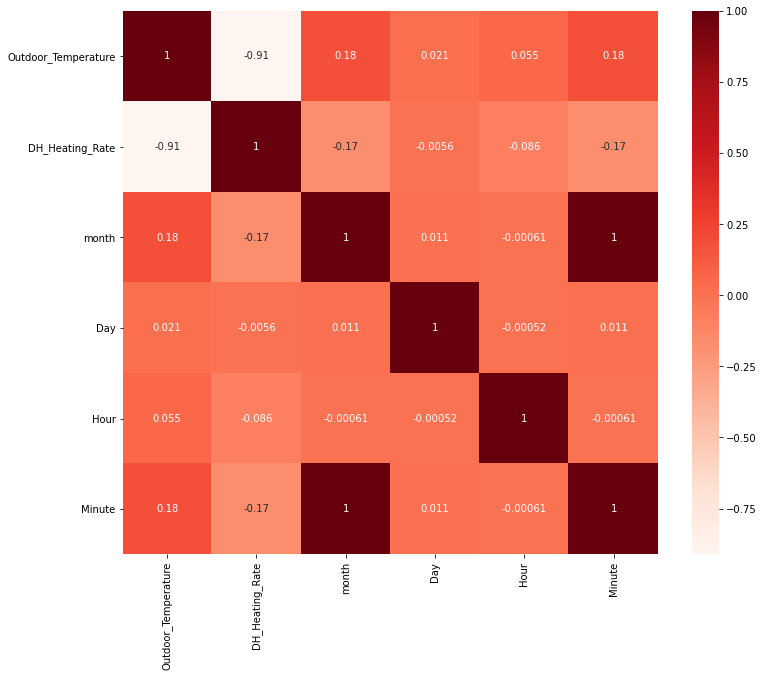

In [35]:
plt.figure(figsize=(12,10))
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
cor

,Outdoor_Temperature,DH_Heating_Rate,month,Day,Hour,Minute
Outdoor_Temperature,1.000000,-0.911325,0.183598,0.020938,0.055135,0.183598
DH_Heating_Rate,-0.911325,1.000000,-0.171925,-0.005617,-0.086441,-0.171925
month,0.183598,-0.171925,1.000000,0.011231,-0.000613,1.000000
Day,0.020938,-0.005617,0.011231,1.000000,-0.000518,0.011231
Hour,0.055135,-0.086441,-0.000613,-0.000518,1.000000,-0.000613
Minute,0.183598,-0.171925,1.000000,0.011231,-0.000613,1.000000
